<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/runtime_mem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git

fatal: destination path 'MBGBLHGP_2019' already exists and is not an empty directory.


In [2]:
!gunzip MBGBLHGP_2019/data/runtime_mem/*

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
matplotlib.rcParams.update({'font.size': 20})

In [5]:
base = "/content/MBGBLHGP_2019/data/runtime_mem/"
c = pd.read_csv(base + "time_cellranger.csv")
k1 = pd.read_csv(base + "time_kallisto_step1_bus.csv")
k2 = pd.read_csv(base + "time_kallisto_step2_correct_count.csv")
star = pd.read_csv(base + "time_star.csv")
salmon = pd.read_csv(base + "time_salmon.csv")
salmon_nwl = pd.read_csv(base + "time_salmon_nowhitelist.csv")

seq_depth=pd.read_csv(base + "seq_depth_stat.csv")
seq_depth.index = seq_depth["ID"]

In [6]:
seq_depth

,ID,reads
ID,,
EMTAB7320_v2,EMTAB7320_v2,335147976
heart1k_v2,heart1k_v2,88872840
heart1k_v3,heart1k_v3,84512390
hgmm10k_v3,hgmm10k_v3,721180737
hgmm1k_v2,hgmm1k_v2,75225120
hgmm1k_v3,hgmm1k_v3,63105786
neuron10k_v3,neuron10k_v3,357111595
pbmc10k_v3,pbmc10k_v3,638901019
pbmc1k_v3,pbmc1k_v3,66601887


In [7]:
k1.index=k1.ID
k2.index=k2.ID
k = k1 + k2
del k["ID"]

In [8]:
k = k.reset_index()

In [9]:
k["max_rss"] = pd.concat([k1["max_rss"], k2["max_rss"]], axis=1).max(axis=1).values

In [10]:
k.s[0] == k1.s[0] + k2.s[0]

True

In [11]:
c["reads"] = c.ID.map(seq_depth["reads"])
k["reads"] = k.ID.map(seq_depth["reads"])
star["reads"] = star.ID.map(seq_depth["reads"])
salmon["reads"] = salmon.ID.map(seq_depth["reads"])
salmon_nwl["reads"] = salmon_nwl.ID.map(seq_depth["reads"])

In [12]:
k.head()

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,994.4588,0:14:180:02:16,3539.60,7665.74,6935.64,6936.63,42655.92,13799.55,0,335147976
1,heart1k_v2,285.1943,0:04:080:00:36,3482.91,7660.74,6875.66,6876.68,7132.03,1812.71,0,88872840
2,heart1k_v3,283.7067,0:02:280:02:14,11089.57,15991.73,14567.84,14568.83,5247.34,1659.21,0,84512390
3,hgmm10k_v3,1620.3424,0:19:560:07:04,11461.04,20136.83,18789.62,18790.60,49292.68,30749.70,0,721180737
4,hgmm1k_v2,193.5088,0:02:330:00:39,7264.75,11738.47,10954.49,10955.48,9431.13,1632.67,0,75225120


In [13]:
kallisto = k
cellranger = c
salmon_whitelist = salmon
star = star
salmon_nowhitelist = salmon_nwl

# Mapping index sizes

In [14]:
kallisto.ID.values

array(['EMTAB7320_v2', 'heart1k_v2', 'heart1k_v3', 'hgmm10k_v3',
       'hgmm1k_v2', 'hgmm1k_v3', 'neuron10k_v3', 'pbmc10k_v3',
       'pbmc1k_v3', 'SRR6956073_v2', 'SRR6998058_v2', 'SRR7299563_v2',
       'SRR8206317_v2', 'SRR8257100_v2', 'SRR8327928_v2', 'SRR8513910_v2',
       'SRR8524760_v2', 'SRR8599150_v2', 'SRR8611943_v2', 'SRR8639063_v2'],
      dtype=object)

In [15]:
dstoidx = {'EMTAB7320_v2':2.1,
           'heart1k_v2':2.1, 
           'heart1k_v3':2.1, 
           'hgmm10k_v3':4.9,
           'hgmm1k_v2':4.9, 
           'hgmm1k_v3':4.9, 
           'neuron10k_v3':2.1, 
           'pbmc10k_v3':2.4,
           'pbmc1k_v3':2.4, 
           'SRR6956073_v2':1.4, 
           'SRR6998058_v2':2.1, 
           'SRR7299563_v2':1.1,
           'SRR8206317_v2':2.1, 
           'SRR8257100_v2':0.983, 
           'SRR8327928_v2':2.4, 
           'SRR8513910_v2':0.713,
           'SRR8524760_v2':2.4, 
           'SRR8599150_v2':2.1, 
           'SRR8611943_v2':0.582, 
           'SRR8639063_v2':2.1
}

In [16]:
kallisto["idx"] = kallisto.ID.map(dstoidx)

In [17]:
cellranger["idx"] = cellranger.ID.map(dstoidx)
salmon_whitelist["idx"] = salmon_whitelist.ID.map(dstoidx)
star["idx"] = star.ID.map(dstoidx)
salmon_nowhitelist["idx"] = salmon_nowhitelist.ID.map(dstoidx)

# MEMORY

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'nonposy'. In the future this will raise TypeError


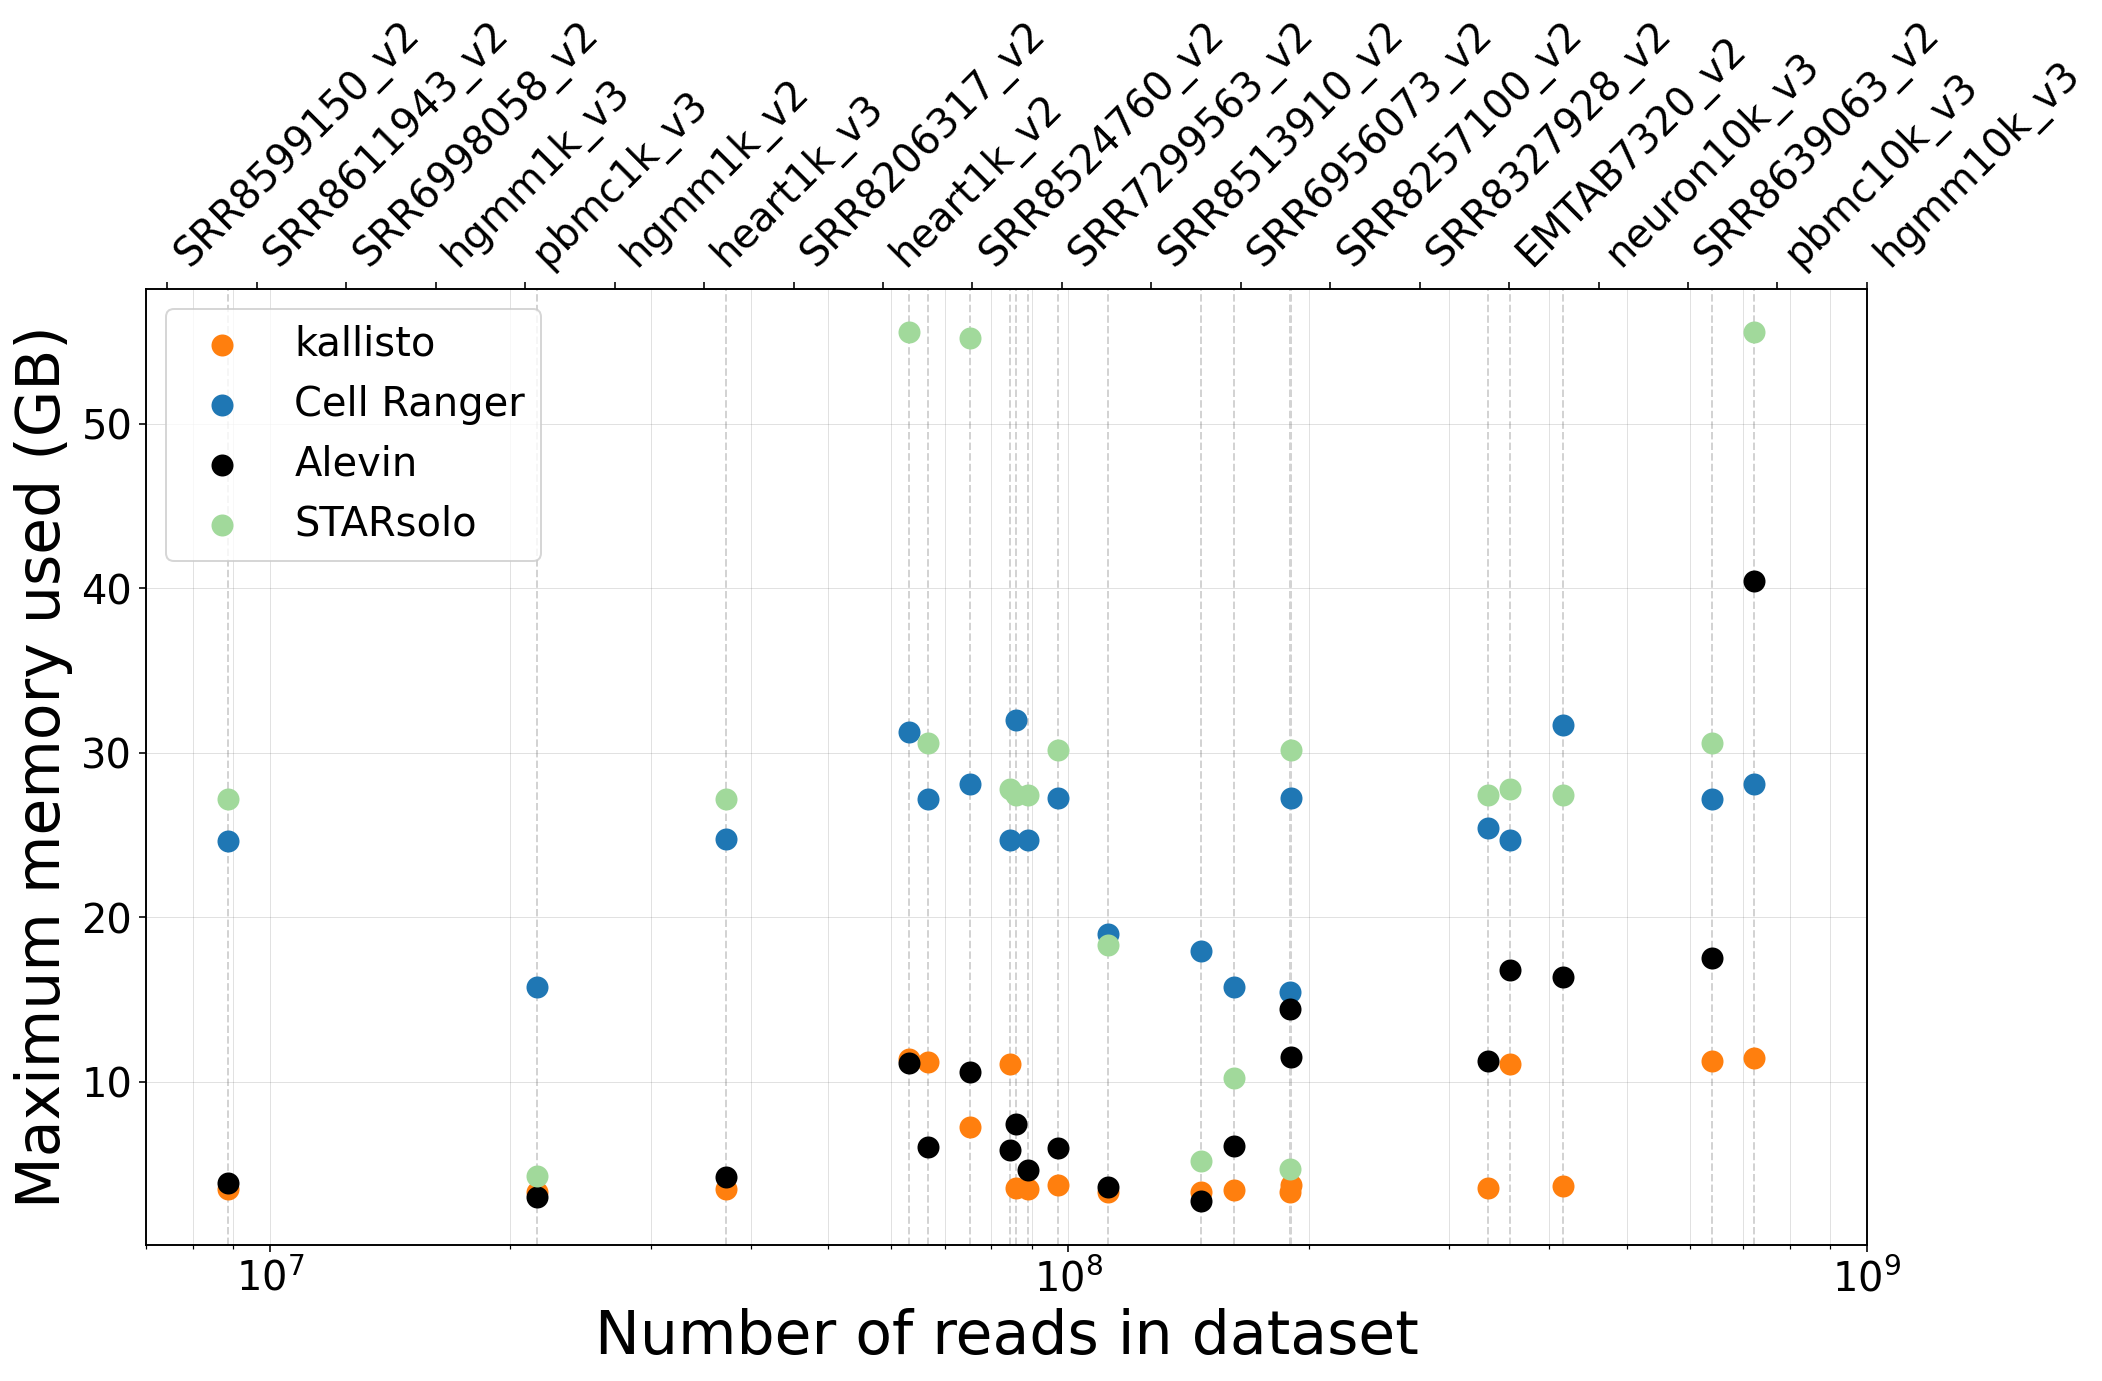

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 30
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'
dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['reads']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)


mem = "max_rss"

size = 100
ax.set_xscale('log')
ax.set_xlim(7e6,1e9) 
ax.set_yscale("linear", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Maximum memory used (GB)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['reads'], kallisto[mem]/1000, 
           label = 'kallisto', color = kallisto_color, zorder=2, s=size)

ax.scatter( cellranger['reads'], cellranger[mem]/1000, 
           label = 'Cell Ranger', color= tenx_color, zorder=2, s=size)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist[mem]/1000, 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_whitelist['reads'], salmon_whitelist[mem]/1000, 
            label = 'Alevin', color= 'black', zorder=2, s=size)

ax.scatter( star['reads'], star[mem]/1000, 
           label = 'STARsolo', color= star_color, zorder=2, s=size)

ax2 = ax.twiny()
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xscale('log')

ax2.set_xticks(ticks=np.linspace(kallisto['reads'].min(), kallisto['reads'].max(), kallisto.shape[0]))
ax2.set_xticklabels( labels=kallisto.sort_values("reads")['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
plt.savefig('./max_memory_alevin_no_whitelist.pdf', dpi=300)

plt.show()


# Plot MEMORY by idx size

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'nonposy'. In the future this will raise TypeError


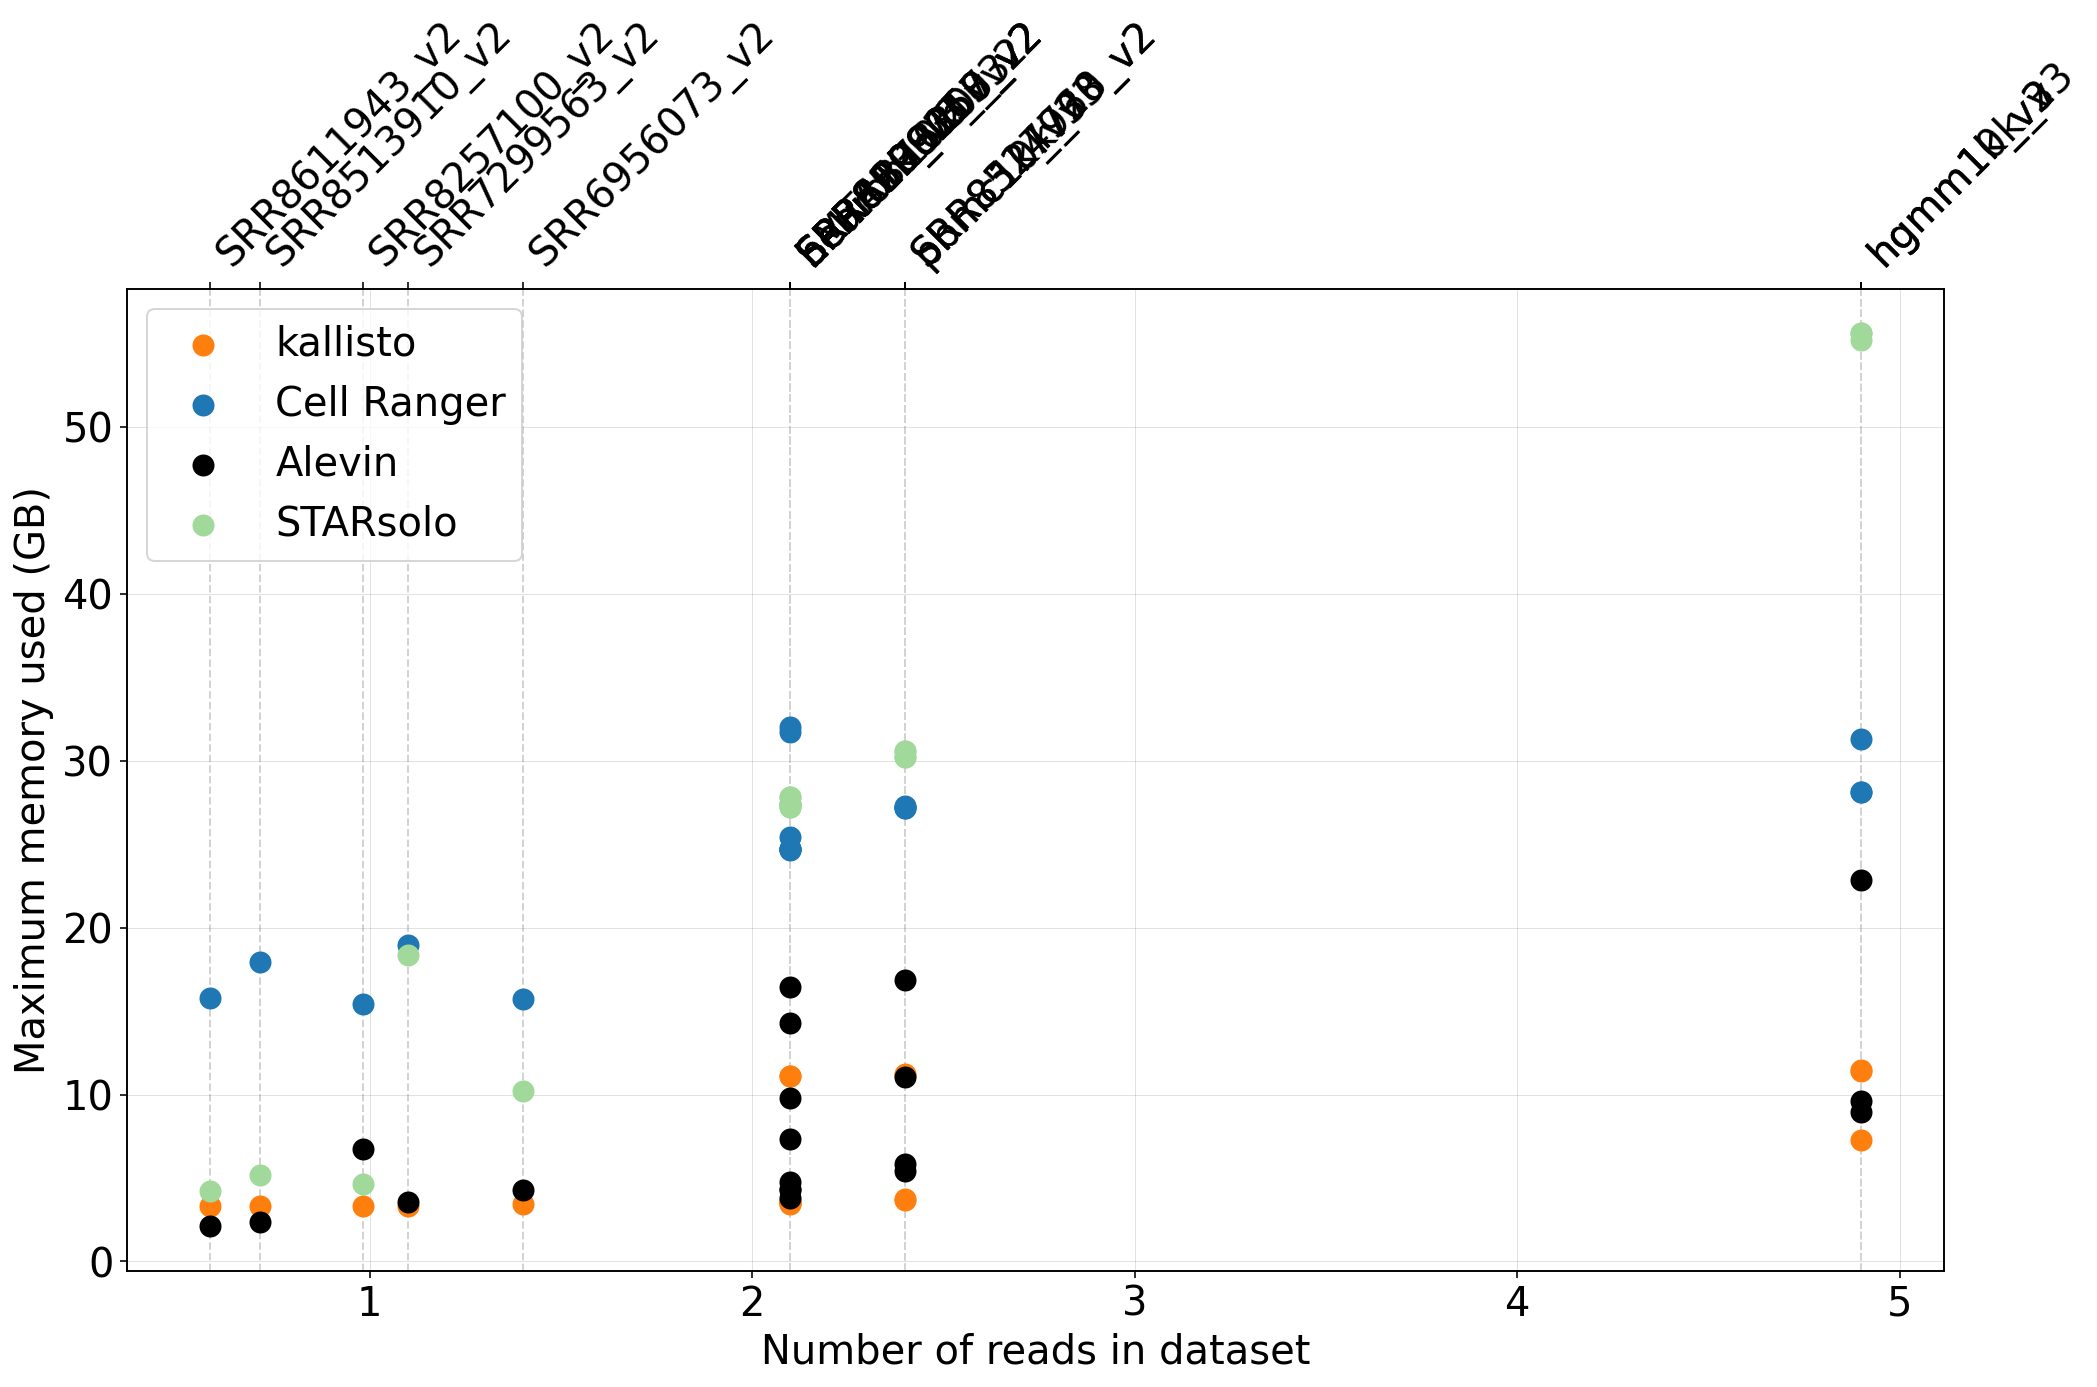

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 20
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'
dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['idx']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)


mem = "max_rss"

size = 100
#ax.set_xscale('log')
#ax.set_xlim(7e6,1e9) 
ax.set_yscale("linear", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Maximum memory used (GB)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['idx'], kallisto[mem]/1000, 
           label = 'kallisto', color = kallisto_color, zorder=2, s=size)

ax.scatter( cellranger['idx'], cellranger[mem]/1000, 
           label = 'Cell Ranger', color= tenx_color, zorder=2, s=size)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist[mem]/1000, 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_nowhitelist['idx'], salmon_nowhitelist[mem]/1000, 
            label = 'Alevin', color= 'black', zorder=2, s=size)

ax.scatter( star['idx'], star[mem]/1000, 
           label = 'STARsolo', color= star_color, zorder=2, s=size)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
#ax2.set_xscale('log')

ax2.set_xticks(ticks=kallisto['idx'])
ax2.set_xticklabels( labels=kallisto['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
#plt.savefig('./max_memory_alevin_no_whitelist.pdf', dpi=300)

plt.show()


# RUNTIME

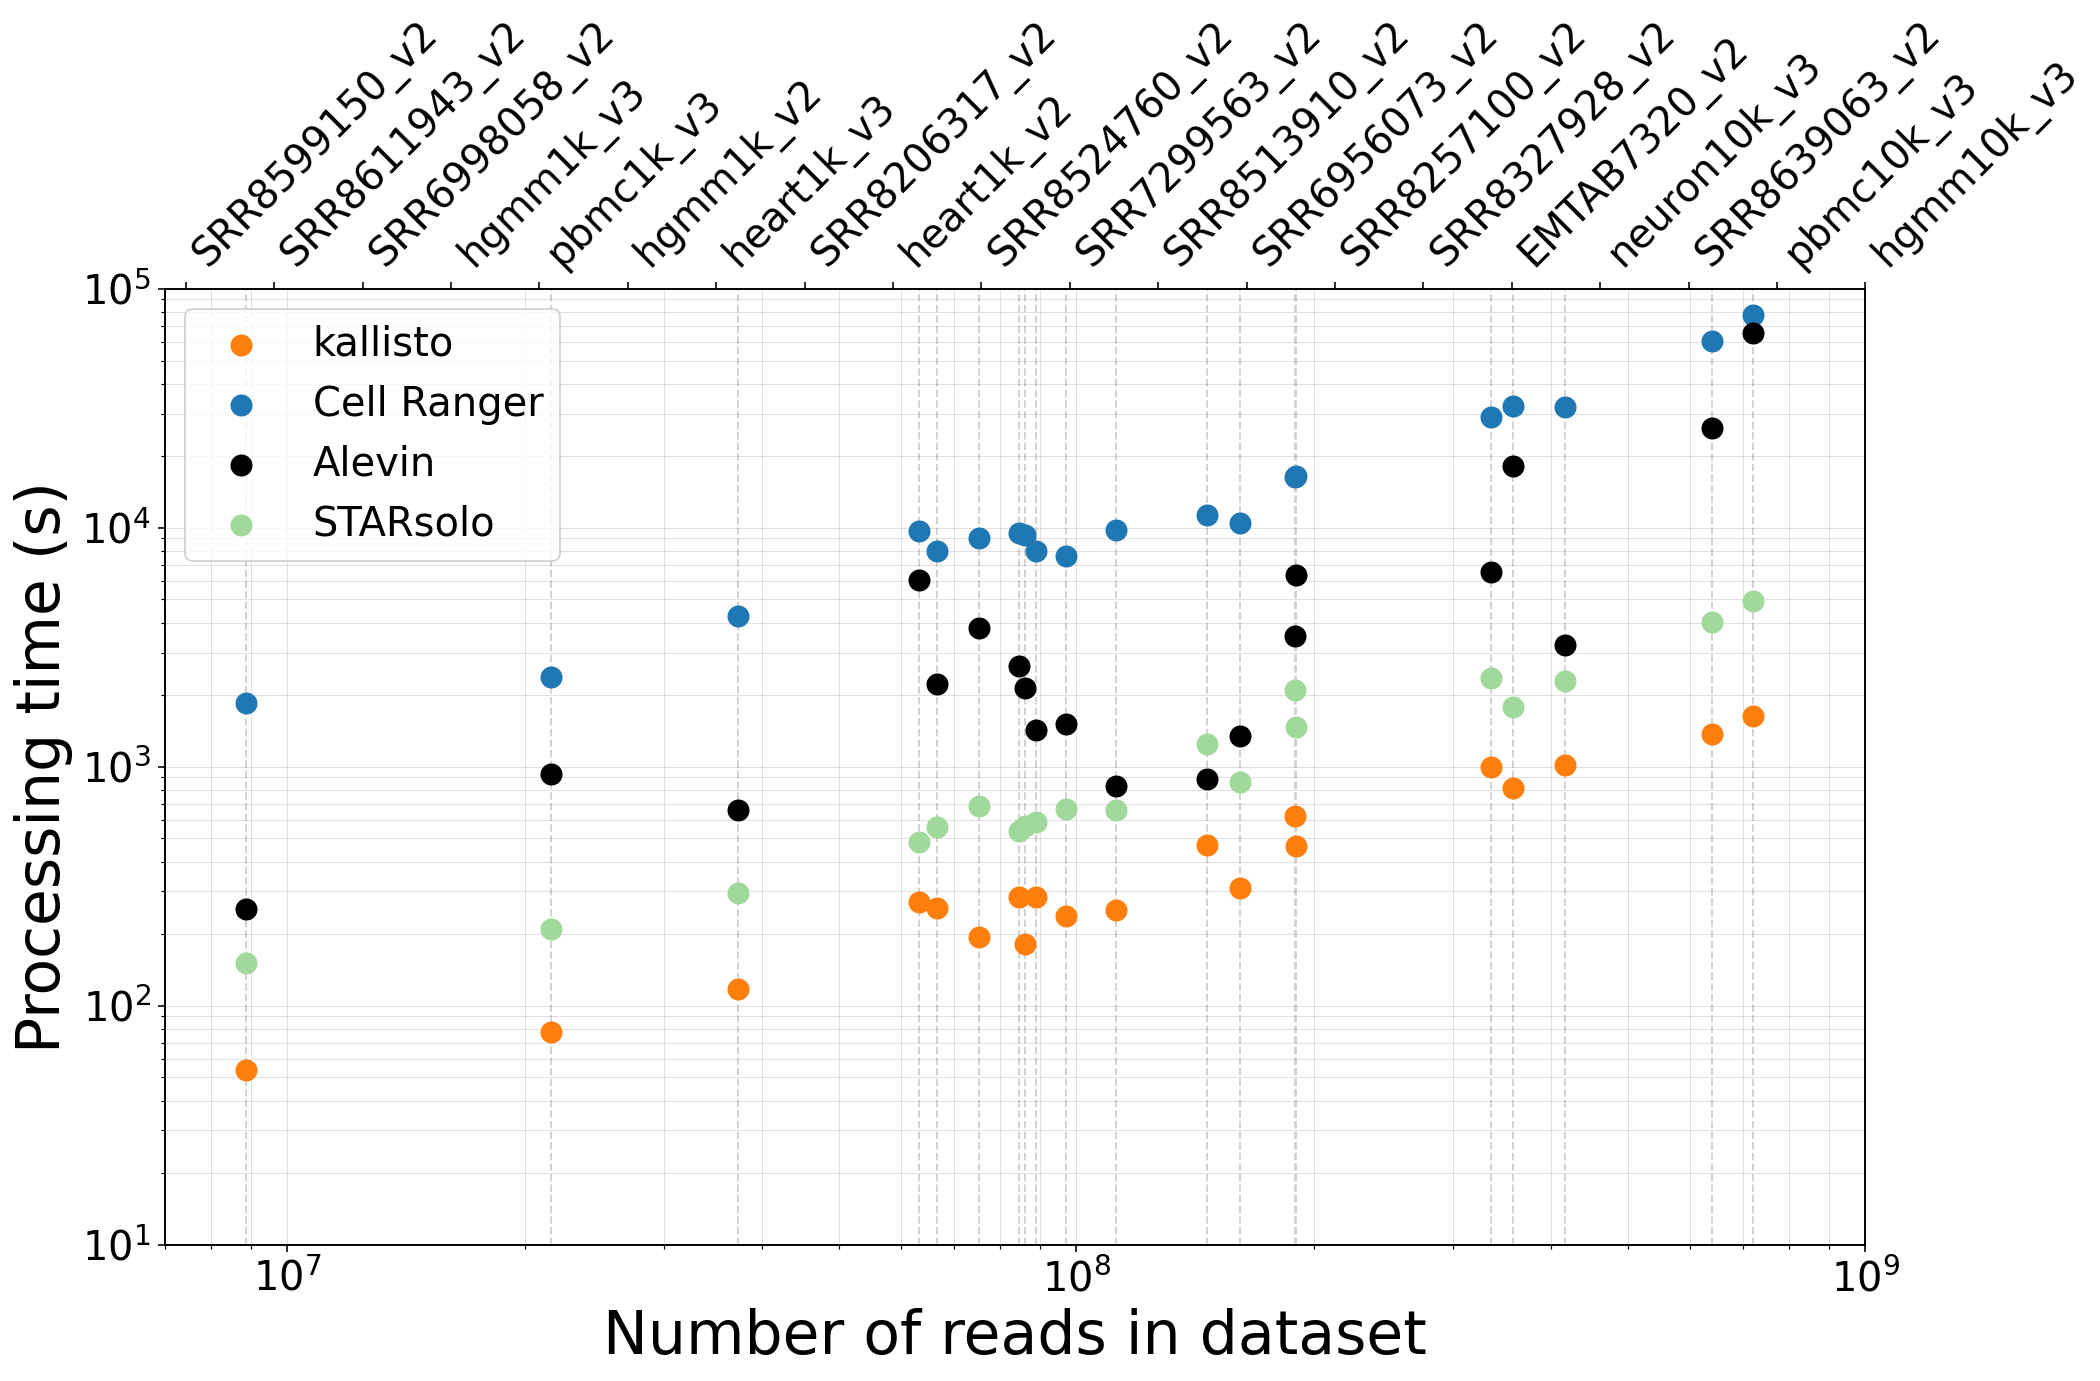

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 30
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'

dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['reads']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)


size=100

ax.set_xscale('log')
ax.set_xlim(7e6,1e9) 
ax.set_ylim(10, 1e5)
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Processing time (s)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['reads'], kallisto['s'], 
           label = 'kallisto', color = kallisto_color, zorder=2, s=size)

ax.scatter( cellranger['reads'], cellranger['s'], 
           label = 'Cell Ranger', color= tenx_color, zorder=2, s=size)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist['s'], 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_whitelist['reads'], salmon_whitelist['s'], 
            label = 'Alevin', color= 'black', zorder=2, s=size)

ax.scatter( star['reads'], star['s'], 
           label = 'STARsolo', color= star_color, zorder=2, s=size)

ax2 = ax.twiny()
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xscale('log')

ax2.set_xticks(ticks=np.linspace(kallisto['reads'].min(), kallisto['reads'].max(), kallisto.shape[0]))
ax2.set_xticklabels( labels=kallisto.sort_values("reads")['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
plt.savefig('./runtimes_alevin_whitelist.pdf', dpi=300)
plt.show()


In [21]:
np.arange(kallisto['reads'].min(), kallisto['reads'].max(), 1e6).shape

(713,)

In [22]:
np.logspace(int(np.format_float_scientific(kallisto['reads'].min())[-2:]), int(np.format_float_scientific(kallisto['reads'].max())[-2:]), kallisto.shape[0])

array([1.00000000e+06, 1.27427499e+06, 1.62377674e+06, 2.06913808e+06,
       2.63665090e+06, 3.35981829e+06, 4.28133240e+06, 5.45559478e+06,
       6.95192796e+06, 8.85866790e+06, 1.12883789e+07, 1.43844989e+07,
       1.83298071e+07, 2.33572147e+07, 2.97635144e+07, 3.79269019e+07,
       4.83293024e+07, 6.15848211e+07, 7.84759970e+07, 1.00000000e+08])

In [23]:
int(np.format_float_scientific(kallisto['reads'].min())[-2:])

6

In [24]:
import math

In [25]:
math.frexp(10*2)[0]**math.frexp(10*2)[1]

0.095367431640625

In [26]:
kallisto.sort_values("reads")


,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads,idx
17,SRR8599150_v2,53.8048,0:00:370:00:16,3463.14,7653.77,6844.22,6845.18,194.32,129.47,0,8860361,2.100
18,SRR8611943_v2,77.5407,0:00:530:00:23,3293.23,5022.26,4266.93,4267.87,1976.58,432.78,0,21574502,0.582
10,SRR6998058_v2,116.8508,0:01:350:00:21,3487.39,7714.91,6930.65,6931.63,3273.41,687.82,0,37227612,2.100
5,hgmm1k_v3,272.4029,0:02:120:02:19,11389.63,20069.80,18643.35,18644.33,3330.27,2358.64,0,63105786,4.900
8,pbmc1k_v3,256.3150,0:02:060:02:09,11194.99,16271.89,14856.13,14857.11,4058.87,1034.66,0,66601887,2.400
4,hgmm1k_v2,193.5088,0:02:330:00:39,7264.75,11738.47,10954.49,10955.48,9431.13,1632.67,0,75225120,4.900
2,heart1k_v3,283.7067,0:02:280:02:14,11089.57,15991.73,14567.84,14568.83,5247.34,1659.21,0,84512390,2.100
12,SRR8206317_v2,180.7884,0:02:160:00:44,3540.11,7678.13,6932.80,6933.79,5386.24,2119.79,0,85992089,2.100
1,heart1k_v2,285.1943,0:04:080:00:36,3482.91,7660.74,6875.66,6876.68,7132.03,1812.71,0,88872840,2.100
16,SRR8524760_v2,237.2855,0:03:190:00:38,3704.12,7937.51,7192.81,7193.74,7337.15,2161.09,0,97106426,2.400
